In [1]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('English_Arthur_J_Arberry.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.width', 1000)  # Set a wide display width

df

,Name,Surah,Ayat,Verse
0,The Opening,1,1,"In the Name of God, the Merciful, the Compassionate"
1,The Opening,1,2,"Praise belongs to God, the Lord of all Being,"
2,The Opening,1,3,"the All-merciful, the All-compassionate,"
3,The Opening,1,4,the Master of the Day of Doom.
4,The Opening,1,5,Thee only we serve; to Thee alone we pray for succour.
...,...,...,...,...
6231,Mankind,114,2,"the King of men,"
6232,Mankind,114,3,"the God of men,"
6233,Mankind,114,4,from the evil of the slinking whisperer
6234,Mankind,114,5,who whispers in the breasts of men


In [2]:
df['Name'] = df['Name'].astype('string')
df['Verse'] = df['Verse'].astype('string')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6236 non-null   string
 1   Surah   6236 non-null   int64 
 2   Ayat    6236 non-null   int64 
 3   Verse   6236 non-null   string
dtypes: int64(2), string(2)
memory usage: 195.0 KB
None


In [3]:
# Ayet sayısı kontrol
"""
# Her bir değerin tekrar sayısını bulma ve bu sayıları yeni bir sütun olarak ekleme
df['Name_count'] = df.groupby('Name')['Name'].transform('count')

# Orijinal sıralamayı koruyarak yalnızca 'Name' ve 'Name_count' sütunlarını görüntüleme
result = df[['Name', 'Name_count']].drop_duplicates()

print(result)
result.to_excel('result_output.xlsx', index=False)
"""

"\n# Her bir değerin tekrar sayısını bulma ve bu sayıları yeni bir sütun olarak ekleme\ndf['Name_count'] = df.groupby('Name')['Name'].transform('count')\n\n# Orijinal sıralamayı koruyarak yalnızca 'Name' ve 'Name_count' sütunlarını görüntüleme\nresult = df[['Name', 'Name_count']].drop_duplicates()\n\nprint(result)\nresult.to_excel('result_output.xlsx', index=False)\n"

In [4]:
# Finding specific phrases
specific_phrase = 'In the name of Allah, the Beneficent, the Merciful'
matching_rows = df[df['Verse'].str.contains(specific_phrase, na=False)]
specific_phrase_count = matching_rows.shape[0]

print(f'The phrase "{specific_phrase}" appears {specific_phrase_count} times:\n')
print(matching_rows)

The phrase "In the name of Allah, the Beneficent, the Merciful" appears 2 times:

             Name  Surah  Ayat                                                                                       Verse
0     The Opening      1     1                                         In the name of Allah, the Beneficent, the Merciful.
3188      The Ant     27    30  Lo! it is from Solomon, and lo! it is: In the name of Allah, the Beneficent, the Merciful;


### Frequency Analysis

In [5]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# 'Verse' sütunundaki noktalama işaretlerini kaldırma ve yeni bir sütun oluşturma
df['NoPunc_Verse'] = df['Verse'].apply(remove_punctuation)

print(df[['Verse', 'NoPunc_Verse']].head())

                                                   Verse                                      NoPunc_Verse
0    In the name of Allah, the Beneficent, the Merciful.  In the name of Allah the Beneficent the Merciful
1                Praise be to Allah, Lord of the Worlds,             Praise be to Allah Lord of the Worlds
2                          The Beneficent, the Merciful.                       The Beneficent the Merciful
3                          Owner of the Day of Judgment,                      Owner of the Day of Judgment
4  Thee (alone) we worship; Thee (alone) we ask for help  Thee alone we worship Thee alone we ask for help


In [6]:
# Word frequency analysis
from collections import Counter
import itertools
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['NoSW_Verse'] = df['NoPunc_Verse'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Tüm kelimeleri tek bir listede birleştirin
all_words = list(itertools.chain(*df['NoSW_Verse'].str.split()))
word_freq = Counter(all_words)

print(word_freq.most_common(10))

[('Allah', 2659), ('unto', 1786), ('ye', 1765), ('Lo', 1092), ('Lord', 975), ('said', 759), ('hath', 754), ('thee', 595), ('thou', 573), ('say', 420)]


In [7]:
# Stopwords listesini alfabetik olarak yazdırma
sorted_stop_words = sorted(stop_words)

for word in sorted_stop_words:
    print(word)

a
about
above
after
again
against
ain
all
am
an
and
any
are
aren
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can
couldn
couldn't
d
did
didn
didn't
do
does
doesn
doesn't
doing
don
don't
down
during
each
few
for
from
further
had
hadn
hadn't
has
hasn
hasn't
have
haven
haven't
having
he
her
here
hers
herself
him
himself
his
how
i
if
in
into
is
isn
isn't
it
it's
its
itself
just
ll
m
ma
me
mightn
mightn't
more
most
mustn
mustn't
my
myself
needn
needn't
no
nor
not
now
o
of
off
on
once
only
or
other
our
ours
ourselves
out
over
own
re
s
same
shan
shan't
she
she's
should
should've
shouldn
shouldn't
so
some
such
t
than
that
that'll
the
their
theirs
them
themselves
then
there
these
they
this
those
through
to
too
under
until
up
ve
very
was
wasn
wasn't
we
were
weren
weren't
what
when
where
which
while
who
whom
why
will
with
won
won't
wouldn
wouldn't
y
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves


In [8]:
# Kendi stopwords kelimelerinizi ekleyin
additional_stop_words = {"lo", "ye", "hath", "unto", "therein"}
#, "thee", "thy", "thou", "shall", "may"

custom_stop_words = stop_words.union(additional_stop_words)
df['NoSW_Verse2'] = df['NoPunc_Verse'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in custom_stop_words]))

all_words = list(itertools.chain(*df['NoSW_Verse2'].str.split()))
word_freq = Counter(all_words)

print(word_freq.most_common(10))

[('Allah', 2659), ('Lord', 975), ('said', 759), ('thee', 595), ('thou', 573), ('say', 420), ('believe', 419), ('may', 402), ('earth', 390), ('thy', 388)]


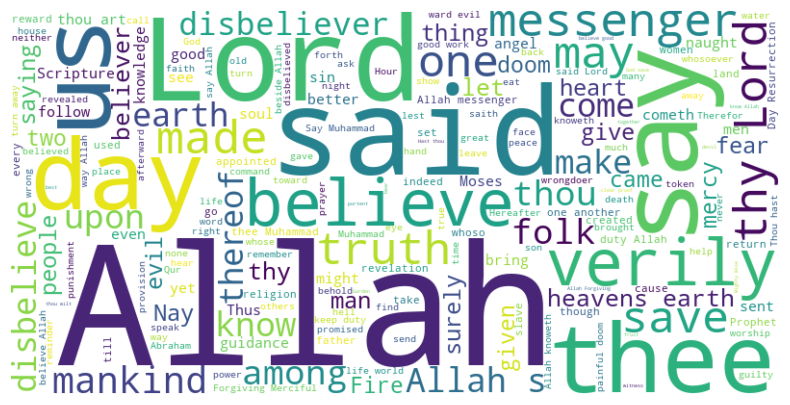

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(all_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Yayınlama

In [10]:
import streamlit as st

# Streamlit uygulama başlığı
st.title('Quran Word Cloud')

# Streamlit ile kelime bulutunu gösterme
st.pyplot(plt)

2024-09-04 09:17:27.245 
  command:

    streamlit run C:\Users\EylülRanaSaraç\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()